In [1]:
import sys
import pandas as pd
sys.path.append('PlottingCombined/')
from CreateStatsAndProgressionPlots import GenerateStatsAndProgressionPlot
from HouseKeepingFunctions import CheckFileExistence,CreateDirectory

#GenerateStatsAndProgressionPlot(i_dates,PlotOutPath,Index_File,PlotOutPath)


In [2]:
IndexFilePath='/dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/'
Index_File=IndexFilePath+'Indexes3.csv'#WithRestlessness' Output For Notebook 
i_dates='3054'

#CreateDirectory(IndexFilePath+i_dates+'/OutResults/')
PlotOutPath=IndexFilePath+i_dates+'/OutResults/'


#GenerateStatsAndProgressionPlot(i_dates,PlotOutPath,Index_File,PlotOutPath)

In [3]:
df=pd.read_csv(Index_File)
df.head()

,Unnamed: 0,Ru_mDI,Ru_RespRate,Ru_RMSSD,Ru_MADI,Ru_RMI,Ru_RMDA_RMS,Restlessness3Sec,Index,ID,Date,BPI_ht_Mean_max,label
0,0,0.638333,15,0.830276,1.775,0.421302,1.019169,0.016750,2018-08-30 00:09:05.645000_2018-08-30 00:10:05...,3054,3054,0.255469,5
1,1,0.566000,13,0.635091,1.080,0.362715,0.994024,0.050500,2018-08-30 00:10:05.645000_2018-08-30 00:11:05...,3054,3054,0.185353,5
2,2,0.470000,15,0.508852,0.705,0.395330,0.997147,0.000000,2018-08-30 00:13:05.645000_2018-08-30 00:14:05...,3054,3054,0.232336,5
3,3,0.348333,15,0.481612,0.940,0.402845,0.983772,0.016667,2018-08-30 00:14:05.645000_2018-08-30 00:15:05...,3054,3054,0.238651,5
4,4,0.461000,14,0.499795,0.735,0.384690,1.008863,0.016750,2018-08-30 00:15:05.645000_2018-08-30 00:16:05...,3054,3054,0.224353,5


In [4]:

df.rename(columns = {'Ru_RMSSD':'RMSSD', 'Ru_mDI':'mDI',\
                                'Ru_MADI':'MADI','Ru_RMI':'RMI','Ru_RespRate':'RespRate'\
                                ,'Ru_RMDA_RMS':'RMS_DA','Restlessness3Sec':'RF','BPI_ht_Mean_max':'BPI'}, inplace = True)
df.head()

,Unnamed: 0,mDI,RespRate,RMSSD,MADI,RMI,RMS_DA,RF,Index,ID,Date,BPI,label
0,0,0.638333,15,0.830276,1.775,0.421302,1.019169,0.016750,2018-08-30 00:09:05.645000_2018-08-30 00:10:05...,3054,3054,0.255469,5
1,1,0.566000,13,0.635091,1.080,0.362715,0.994024,0.050500,2018-08-30 00:10:05.645000_2018-08-30 00:11:05...,3054,3054,0.185353,5
2,2,0.470000,15,0.508852,0.705,0.395330,0.997147,0.000000,2018-08-30 00:13:05.645000_2018-08-30 00:14:05...,3054,3054,0.232336,5
3,3,0.348333,15,0.481612,0.940,0.402845,0.983772,0.016667,2018-08-30 00:14:05.645000_2018-08-30 00:15:05...,3054,3054,0.238651,5
4,4,0.461000,14,0.499795,0.735,0.384690,1.008863,0.016750,2018-08-30 00:15:05.645000_2018-08-30 00:16:05...,3054,3054,0.224353,5


In [5]:
Label=df['label'].to_list()
df=df.drop(columns=['Unnamed: 0','ID','Index','Index','ID'])
df.head()

,mDI,RespRate,RMSSD,MADI,RMI,RMS_DA,RF,Date,BPI,label
0,0.638333,15,0.830276,1.775,0.421302,1.019169,0.016750,3054,0.255469,5
1,0.566000,13,0.635091,1.080,0.362715,0.994024,0.050500,3054,0.185353,5
2,0.470000,15,0.508852,0.705,0.395330,0.997147,0.000000,3054,0.232336,5
3,0.348333,15,0.481612,0.940,0.402845,0.983772,0.016667,3054,0.238651,5
4,0.461000,14,0.499795,0.735,0.384690,1.008863,0.016750,3054,0.224353,5


In [16]:
import collections
from plotnine.data import mpg
import math
from PerformClusteringFunctions import getDataFeaturesStatistics 

#from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_bar, facet_grid, facet_wrap, theme
from plotnine import *

def PlotStatsForLabelClusters2(data,Label,x,yStat,colorFeature,RespRateInclude,path,dating):
    BigfStats=pd.DataFrame()
    data['label']=Label
    for num_lab in collections.Counter(Label).keys():
        label1=pd.DataFrame()
        label1=data[data['label']==num_lab]
        label1=label1.drop(columns=['label'])
        fStats=pd.DataFrame()
        fStats=getDataFeaturesStatistics(label1,"No")
        fStats['Cluster Number']=num_lab
        BigfStats=BigfStats.append(fStats)
    #display(BigfStats.tail(20))
    #print(BigfStats['Features'])
    #print(BigfStats.shape)
    
    if(RespRateInclude=="WithoutRespRate"):
        BigfStats=BigfStats[(BigfStats['Features']!='RespRate') & (BigfStats['Features']!='RMS_DA') & (BigfStats['Features']!='RF')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line(size = 1) +\
        ylab('Mean of Features')+xlab('Cluster Number')+\
        scale_color_manual(values=["#0000FF", "#f71e8b", "#5E538E", "#009E73","#FB8500"])+\
       theme(plot_title = element_text(size = 20, face = "bold"),\
                    axis_text_x  = element_text(hjust = 1,size = 16,colour = 'black'),\
                  axis_text_y  = element_text( hjust = 1,size = 16,colour = 'black'),\
                  axis_title_x = element_text(size = 18,face = "bold", colour = 'black',angle = 0),\
                  axis_title_y = element_text(size = 18,face = "bold", colour = 'black', angle = 90),\
                legend_title = element_text(size = 18, face = "bold"),\
              legend_text  = element_text(size = 16,colour = 'black'))
        #"#B22222"#FFB703,"#FFD700"])#, "#f74a0a","#b202f7"])
         #theme(axis_text_x  = element_text(angle = 70, hjust = 1)) #+
        ggsave(plot = g, filename = dating+"_WithoutRespRate", path = path)
        
    elif(RespRateInclude=="All"):
        BigfStats=BigfStats[(BigfStats['Features']!='RMS_DA') & (BigfStats['Features']!='RF')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line(size = 1) +\
        ylab('Mean of Features')+xlab('Cluster Number')+\
        scale_color_manual(values=["#0000FF", "#f71e8b", "#5E538E", "#009E73","#FB8500","#f74a0a"])+\
       theme(plot_title = element_text(size = 20, face = "bold"),\
                    axis_text_x  = element_text(hjust = 1,size = 16,colour = 'black'),\
                  axis_text_y  = element_text( hjust = 1,size = 16,colour = 'black'),\
                  axis_title_x = element_text(size = 18,face = "bold", colour = 'black',angle = 0),\
                  axis_title_y = element_text(size = 18,face = "bold", colour = 'black', angle = 90),\
                legend_title = element_text(size = 18, face = "bold"),\
              legend_text  = element_text(size = 16,colour = 'black'))
        #"#B22222"#FFB703,"#FFD700"])#, "#f74a0a","#b202f7"])
         #theme(axis_text_x  = element_text(angle = 70, hjust = 1)) #+
        ggsave(plot = g, filename = dating+"_WithoutRespRate", path = path)
    
    
    elif(RespRateInclude=="WithRespRate"):
        BigfStats=BigfStats[(BigfStats['Features']=='RespRate')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
        geom_point()+geom_line(size = 1) +\
        ylab('Mean of Features')+xlab('Cluster Number')+\
        scale_color_manual(values=["#f74a0a"])+\
        theme(plot_title = element_text(size = 20, face = "bold"),\
                    axis_text_x  = element_text(hjust = 1,size = 16,colour = 'black'),\
                  axis_text_y  = element_text( hjust = 1,size = 16,colour = 'black'),\
                  axis_title_x = element_text(size = 18,face = "bold", colour = 'black',angle = 0),\
                  axis_title_y = element_text(size = 18,face = "bold", colour = 'black', angle = 90),\
                legend_title = element_text(size = 18, face = "bold"),\
              legend_text  = element_text(size = 16,colour = 'black'))
        #scale_color_manual(values=["#0000FF", "#f71e8b", "#B22222", "#009E73", "#f74a0a","#b202f7","#FF3300"])#,"#b202f7"])
        #
        #
        
        ggsave(plot = g, filename = dating+"_WithRespRate", path = path)
    elif(RespRateInclude=="WithRMS_DA"):
        BigfStats=BigfStats[(BigfStats['Features']=='RMS_DA')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
        geom_point()+geom_line(size = 1) +\
        ylab('Mean of Features')+xlab('Cluster Number') +\
        scale_color_manual(values=["#b202f7"]) +\
        theme(plot_title = element_text(size = 20, face = "bold"),\
                    axis_text_x  = element_text(hjust = 1,size = 16,colour = 'black'),\
                  axis_text_y  = element_text( hjust = 1,size = 16,colour = 'black'),\
                  axis_title_x = element_text(size = 18,face = "bold", colour = 'black',angle = 0),\
                  axis_title_y = element_text(size = 18,face = "bold", colour = 'black', angle = 90),\
                legend_title = element_text(size = 18, face = "bold"),\
              legend_text  = element_text(size = 16,colour = 'black'))
        #scale_color_manual(values=["#0000FF", "#f71e8b", "#B22222", "#009E73", "#f74a0a","#b202f7","#FF3300","#b202f7"])
        #ggtitle("Mean of features in each cluster("+dating+")")
        ggsave(plot = g, filename = dating+"_WithRMS_DA", path = path)
        
        
    elif(RespRateInclude=="WithRestlessness"):
        BigfStats=BigfStats[(BigfStats['Features']=='RF')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
        geom_point()+geom_line(size = 1) +\
        ylab('Mean of Features')+xlab('Cluster Number')+\
        scale_color_manual(values=["#1F7DAD"])+\
        theme(plot_title = element_text(size = 20, face = "bold"),\
                    axis_text_x  = element_text(hjust = 1,size = 16,colour = 'black'),\
                  axis_text_y  = element_text( hjust = 1,size = 16,colour = 'black'),\
                  axis_title_x = element_text(size = 18,face = "bold", colour = 'black',angle = 0),\
                  axis_title_y = element_text(size = 18,face = "bold", colour = 'black', angle = 90),\
                legend_title = element_text(size = 18, face = "bold"),\
              legend_text  = element_text(size = 16,colour = 'black'))
        #scale_color_manual(values=["#0000FF", "#f71e8b", "#B22222", "#009E73", "#f74a0a","#b202f7","#FF3300","#b202f7"])
        ggsave(plot = g, filename = dating+"_WithRestlessness", path = path)
        
        
        
    else:
        print("HI")
        return
        
    print(g)
   


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/3054_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)


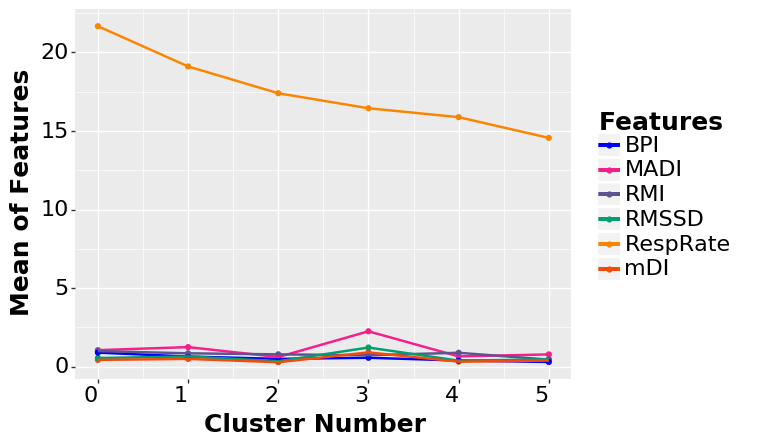

<ggplot: (8753685435144)>


In [17]:
PlotStatsForLabelClusters2(df,Label,'label','mean','Features',"All",PlotOutPath,i_dates)


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/3054_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)


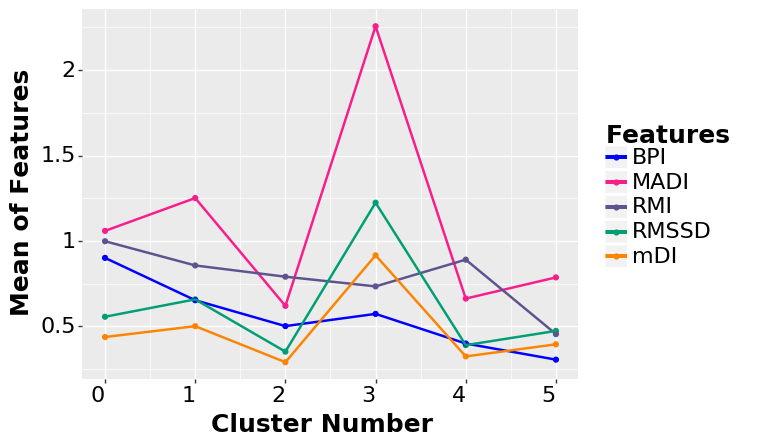

<ggplot: (-9223363283169278944)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/3054_WithRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)


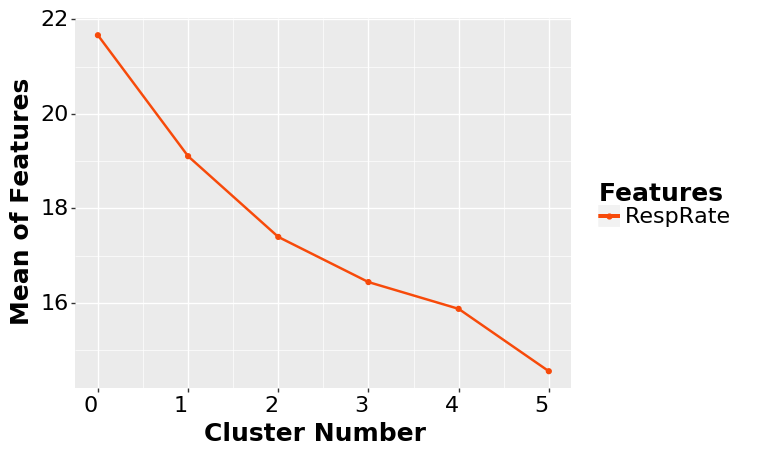

<ggplot: (8753684832832)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/3054_WithRMS_DA
  warn('Filename: {}'.format(filename), PlotnineWarning)


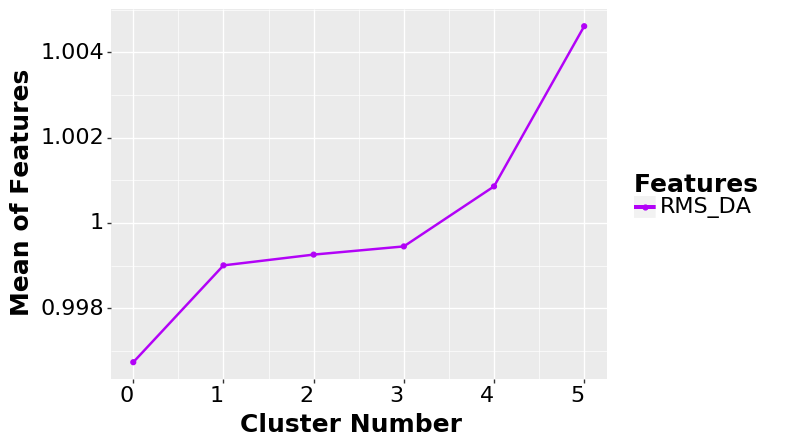

<ggplot: (8753684832832)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/3054_WithRestlessness
  warn('Filename: {}'.format(filename), PlotnineWarning)


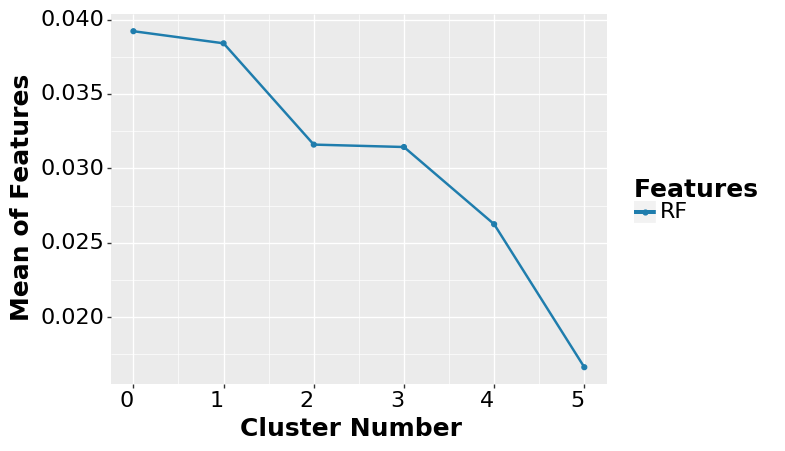

<ggplot: (8753665141224)>


/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/opt/conda/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /dsa/home/pg3fy/jupyter/IR/COPD/NEW_WORK_For_IE_Ratio_AND_FeatureExtraction_AND_Clustering_PythonPeakDetection/PlottingCombined/PredictionsPub/3054/OutResults/3054_WithoutRespRate
  warn('Filename: {}'.format(filename), PlotnineWarning)


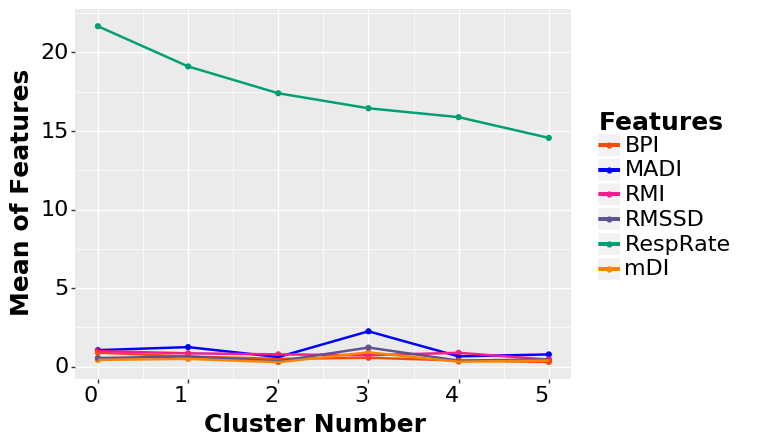

<ggplot: (-9223363283189634616)>


In [8]:
PlotStatsForLabelClusters2(df,Label,'label','mean','Features',"WithoutRespRate",PlotOutPath,i_dates)
    
PlotStatsForLabelClusters2(df,Label,'label','mean','Features',"WithRespRate",PlotOutPath,i_dates)

PlotStatsForLabelClusters2(df,Label,'label','mean','Features',"WithRMS_DA",PlotOutPath,i_dates)

PlotStatsForLabelClusters2(df,Label,'label','mean','Features',"WithRestlessness",PlotOutPath,i_dates)



In [9]:
import collections
from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_bar, facet_grid, facet_wrap, theme
def PlotStatsForLabelClusters(data,Label,x,yStat,colorFeature):
    BigfStats=pd.DataFrame()
    data['label']=Label
    for num_lab in collections.Counter(Label).keys():
        label1=pd.DataFrame()
        label1=data[data['label']==num_lab]
        label1=label1.drop(columns=['label'])
        fStats=pd.DataFrame()
        fStats=getDataFeaturesStatistics(label1,"No")
        fStats['label']=num_lab
        BigfStats=BigfStats.append(fStats)
        #display(BigfStats.tail())

    #BigfStats=BigfStats[(BigfStats['Features']!='Ru_RespRate') & (BigfStats['Features']!='Ru_SD_RR')]
    g = ggplot(BigfStats, aes(x=x, y=yStat, color=colorFeature,group=colorFeature)) +\
            geom_point()+geom_line()#+ facet_wrap('Date')# + theme(axis_text_x  = element_text(angle = 70, hjust = 1)) #+
    print(g)

In [ ]:
import collections
from plotnine.data import mpg
import math

#from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_bar, facet_grid, facet_wrap, theme
from plotnine import *

#                            df_3054_1,label,'label','mean','Features',"WithRespRate",Resultpath,i_dates
def PlotStatsForLabelClusters2(data,Label,x,yStat,colorFeature,RespRateInclude,path,dating):
    BigfStats=pd.DataFrame()
    data['label']=Label
    for num_lab in Counter(Label).keys():
        label1=pd.DataFrame()
        label1=data[data['label']==num_lab]
        label1=label1.drop(columns=['label'])
        fStats=pd.DataFrame()
        fStats=getDataFeaturesStatistics(label1,"No")
        fStats['Cluster Number']=num_lab
        BigfStats=BigfStats.append(fStats)
    display(BigfStats.tail())
    if(RespRateInclude=="WithoutRespRate"):
        BigfStats=BigfStats[(BigfStats['Features']!='RespRate') & (BigfStats['Features']!='RMS_DA') & (BigfStats['Features']!='RestlessnessType3')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line() +  ggtitle("Mean of features in each cluster("+dating+")")+\
        scale_color_manual(values=["#0000FF", "#f71e8b", "#B22222", "#009E73"])#, "#f74a0a","#b202f7"])
         #theme(axis_text_x  = element_text(angle = 70, hjust = 1)) #+
        ggsave(plot = g, filename = dating+"_WithoutRespRate", path = path)
    elif(RespRateInclude=="WithRespRate"):
        BigfStats=BigfStats[(BigfStats['Features']!='Mean_Prom')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line() + ggtitle("Mean of features in each cluster("+dating+")")+\
        scale_color_manual(values=["#0000FF", "#f71e8b", "#B22222", "#009E73", "#f74a0a","#b202f7","#FF3300"])
        ggsave(plot = g, filename = dating+"_WithRespRate", path = path)
    elif(RespRateInclude=="Mean_Prom"):
        BigfStats=BigfStats[(BigfStats['Features']!='RespRate') & (BigfStats['Features']!='Mean_Prom') & (BigfStats['Features']!='RMI')]
        g = ggplot(BigfStats, aes(x='Cluster Number', y=yStat, color=colorFeature,group=colorFeature))+\
            geom_point()+geom_line() + ggtitle("Mean of features in each cluster("+dating+")")
        ggsave(plot = g, filename = dating+"_WithRespRate", path = path)
        
    #g = ggplot(BigfStats, aes(x=x, y=yStat, color=colorFeature,group=colorFeature))+scale_y_continuous(trans='log10')+\
    #        geom_point()+geom_line()  scale_y_continuous(trans='log10')+  
    print(g)